Almost all machine learning algorithms work with vectors of numbers. Should know how to convert it into a usable format

#### Scales of Measurement data distinction

##### Nominal Data

Can take any arbitrary nonnumerical values. Can neither be measured nor compared. Can be qualitative or quantitative. No arithmetic operations can be applied. Only statistical tendency that can be studied is the mode.

##### Ordinal Data

A type of data whose values follow an order. Don't support basic arithmetic operations, but can be compared using comparison operators. Median can be considered as a valid measure of central tendencies. For example T-shit sies (S, M, L, XL, etc.)

##### Interval data

Values can be compared and the intervals are equally split. Support addition and subtraction. For example, degrees fahrenheit. Difference between 30 and 31F is the same as between 90 and 91F, however, we can't say that 60F is twice as hot as 30F.

##### Ratio Data

Ratio data is a type of data that has a natural zero point and supports all the properties of interval data, along with arithmetic operations of multiplication, division, etc. Values are continuous and support all numeric operations. Can study statistical measures of central tendencies as well as measures of spread like variation for this kind of data.

#### Transforming Ordinal Attributes

Consider the Gender attribute which may have three values - Male, Female and Other. This is a nominal attribute. This can be expressed as a vector of possible values. 

Say, there’s a student with the following values:
Edward Remirez, Male, 28 years, Bachelors Degree

We can convert the gender column to the set of three values:
Edward Remirez, 0, 1, 0, 28 years, Bachelors Degree

This is called one-hot encoding. SKLearn provides simple interface for such transformation using sklearn.preprocessing.

In [1]:
#Transforming Ordinal Attributes

import sklearn
import pandas as pd

df = pd.DataFrame([["Edward Remirez", "Male", 28, "Bachelors"],["Arnav Sharma", "Female",23,"Masters"]], columns = ['Name','Gender','Age','Degree'])

df

from sklearn.preprocessing import OneHotEncoder
encoder_for_gender = OneHotEncoder().fit(df[['Gender']])

encoder_for_gender.categories_
gender_values = encoder_for_gender.transform(df[['Gender']])
gender_values.toarray()

df[['Gender_F', 'Gender_M']] = gender_values.toarray()

df

,Name,Gender,Age,Degree,Gender_F,Gender_M
0,Edward Remirez,Male,28,Bachelors,0.0,1.0
1,Arnav Sharma,Female,23,Masters,1.0,0.0


#### Transforming Ordinal Attributes

Can be transformed in a simpler manner as to preserve information about the ordering and create more meaningful models. Consider again
    Edward Ramirez, Male, 28 years, Bachelors Degree

Education follows an order. We can assign a numeric value to each level: 
HS: 0, Bachelors: 1, Masters:2, Doctorate: 3.

In [2]:
from sklearn.preprocessing import OrdinalEncoder
encoder_for_eduacation = OrdinalEncoder()
encoder_for_eduacation.fit_transform(df[['Degree']])
encoder_for_eduacation.categories_

[array(['Bachelors', 'Masters'], dtype=object)]

In [3]:
encoder_for_eduacation = OrdinalEncoder(categories=[['Masters','Bachelors','High School', 'Doctoral']])
df[['Degree_encoded']] = encoder_for_eduacation.fit
df


,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,28,Bachelors,0.0,1.0,<bound method OrdinalEncoder.fit of OrdinalEnc...
1,Arnav Sharma,Female,23,Masters,1.0,0.0,<bound method OrdinalEncoder.fit of OrdinalEnc...


### Normalisation

#### Min-Max Scaling

Transforms each feature by compressing it down to a scale where the minimum number in the dataset maps to zero and the maximum maps to one.



In [4]:
"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

"""

#Boring with two values in the dataset

"\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(df[['Age']])\ndf[['Age']] = scaler.transform(df[['Age']])\ndf\n\n"

##### Standard Scaling

Standard scaling standardizes the feature values by removing the mean and scaling to unit variance. 

In [5]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,1.0,Bachelors,0.0,1.0,<bound method OrdinalEncoder.fit of OrdinalEnc...
1,Arnav Sharma,Female,-1.0,Masters,1.0,0.0,<bound method OrdinalEncoder.fit of OrdinalEnc...


In [6]:
#Can view the parameters of the scaler using

scaler.mean_
scaler.scale_

array([2.5])

### Preprocessing Text

(Need to figure out installation in jupyter notebook)

Popular library for NLP (Natural Language Processing) is NLTK. 

When you encounter textual data, one of the primary aims should be to develop a 
pipeline that takes text as input and produces vectors for each sentence or document (or whatever unit of data you wish to consider). It goes through the following steps:

##### Segmentation
The process of finding the sentence boundaries. Full stop is not always a boundary - can be an abbreviation.

##### Tokenization
Breaks a sentence or a sequence into individual components called tokens. Can be words, special characters, numbers, etc. (c.f. NLP notebook)

###### Stemming and Lemmatisation

For grammatical reasons, the same word root can be present in different forms in the text. In most cases, they lead to a similar meaning, e.g. work, working, worked - all convey a similar meaning in essense, though the interpretation is slightly different. Stemming is the process of extracting the word root.

One method: Porter's Stemmer: Performs rule-based operations like
SSES -> SS
IES -> I
SS -> SS
S -> 

##### Removing Stopwords

Several high-frequency words that increase memory usage but can be ignored with minimal increase in the error: words such as "a", "and", "now". Called stopwords. NLTK can help us remove them by matching with a word list.

###### Preparing Word Vectors

Text also needs to be converted into a vector form. One mechanism is to treat a sentence as a bag of words, which can be encoded similar to one-hot mechanism with variation to either put the number 1 in the columns representing all the present words ro put thecount of the number of occurences of the word in the given sentence:

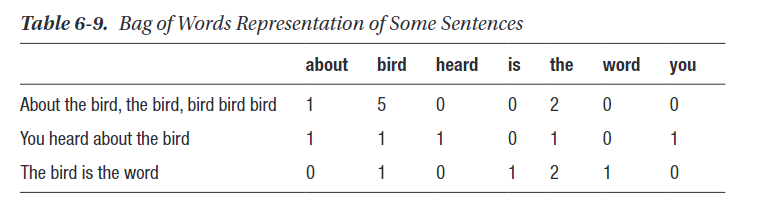

For this purpose, we can use CountVectorizer or one of the other Vectorizers available in SKLearn.

##### Preprocessing Images

Full-colour images can be seen as a 3D arraay, where two dimensions are used to represent the row and column number of a pixel and the third dimension representes the colour channel, red green or blue. The value in each cell represents the intensity of each colour channel at the given cell.

One way is to use Matplotlib's imread function:

There are extensive libraries for image processing and computer vision, most popular being OpenCV and Scikit-Image. Example below:


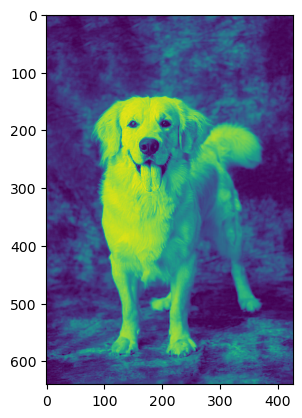

In [3]:
import matplotlib.pyplot as plt
img = plt.imread('C:\\Users\\adam\\puppy.jepg.jpg')
plt.imshow(img)

# The third dimension represents the colour channel:

plt.imshow(img[:,:,0])

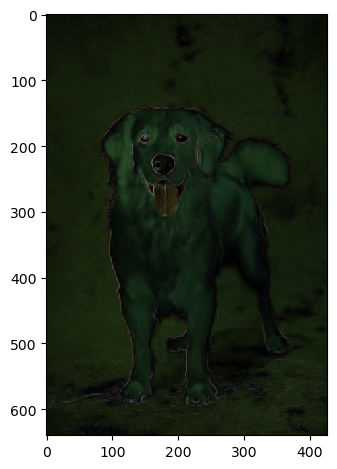

In [ ]:
#This filter is used to create an image emphasising the edges of the original image.

from skimage import io, filters
img = plt.imread('C:\\Users\\adam\\puppy.jepg.jpg')
edges = filters.sobel(img)
io.imshow(edges)
io.show()